In [177]:
import os, sys, re, pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.utils.model_handling import get_models_evaluation_data, load_checkpoint, get_model_cfg_from_checkpoint, get_training_cfg_from_checkpoint
from src.utils.visualization import plot_training_metrics

project_root = os.path.abspath(os.path.join(os.getcwd(), '../'))

# Expert Rewards

In [178]:
data_expert = {}

Default environment:

In [179]:
file_path = os.path.join(project_root, 'results', 'expert', 'evaluation-expert-reward_per_episode_all-env_setup-coef_of_var_0.pkl')
with open(file_path, 'rb') as f:
    expert_eval_data = pickle.load(f)

In [180]:
env_seed = []
data_expert[0] = []

for env_info, eval_data in expert_eval_data.items():
    env_seed.append(int(re.findall(r'\d+', env_info)[0]))
    data_expert[0].append(int(np.sum(eval_data)))

Altered environment:

In [ ]:
for cv in [5, 10, 20, 40]:
    file_path = os.path.join(project_root, 'results', 'expert', f'evaluation-expert-reward_per_episode_all-env_setup-coef_of_var_{cv}_seed_0.pkl')
    with open(file_path, 'rb') as f:
        expert_eval_data = pickle.load(f)
    data_expert[cv] = []

    for env_info, eval_data in expert_eval_data.items():
        data_expert[cv].append(int(np.sum(eval_data)))

Plotting:

(-300.0, 300.0)

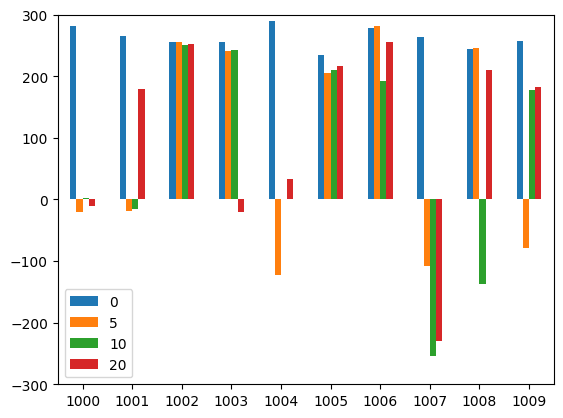

In [182]:
df = pd.DataFrame(data_expert, index=env_seed)

ax = df.plot.bar(rot=0)
ax.set_ylim(-300, 300)

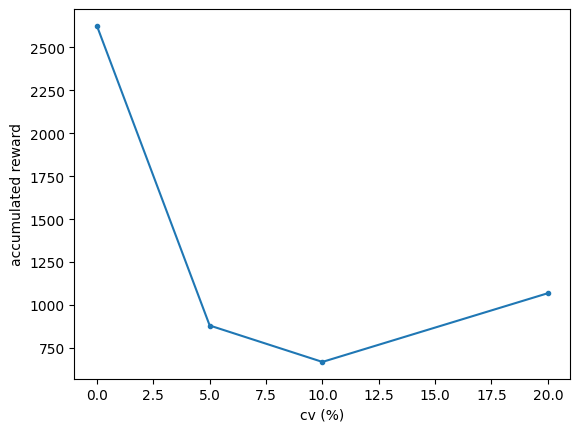

In [183]:
y = []
for key, val in data_expert.items():
    y.append(np.sum(val))

plt.plot(data_expert.keys(), y, marker='.', ls='-')
plt.ylabel('accumulated reward')
plt.xlabel('cv (%)')
plt.show()

# Transformer Rewards

In [184]:
data_transformer = {}

Default environment:

In [185]:
file_path = os.path.join(project_root, 'results', 'models', '3f48m', 'evaluation-3f48m-reward_per_episode_all-env_setup-coef_of_var_0.pkl')
with open(file_path, 'rb') as f:
    expert_eval_data = pickle.load(f)

In [186]:
data_transformer[0] = []

for env_info, eval_data in expert_eval_data.items():
    data_transformer[0].append(int(np.sum(eval_data)))

Altered environment:

In [187]:
for cv in [5, 10, 20]:
    file_path = os.path.join(project_root, 'results', 'models', '3f48m', 'evaluation-3f48m-reward_per_episode_all-env_setup-coef_of_var_20_seed_0.pkl')
    with open(file_path, 'rb') as f:
        expert_eval_data = pickle.load(f)
    data_transformer[cv] = []

    for env_info, eval_data in expert_eval_data.items():
        data_transformer[cv].append(int(np.sum(eval_data)))

Plotting:

(-300.0, 300.0)

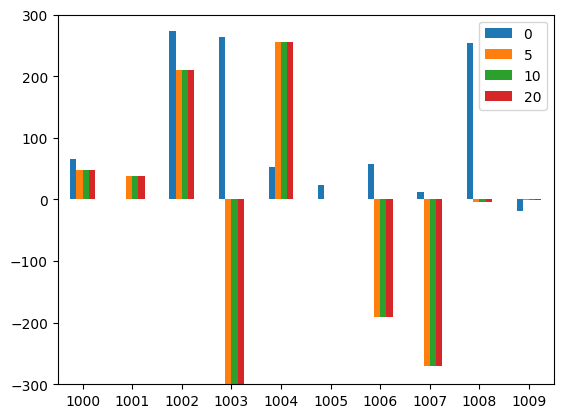

In [188]:
df = pd.DataFrame(data_transformer, index=env_seed)

ax = df.plot.bar(rot=0)
ax.set_ylim(-300, 300)

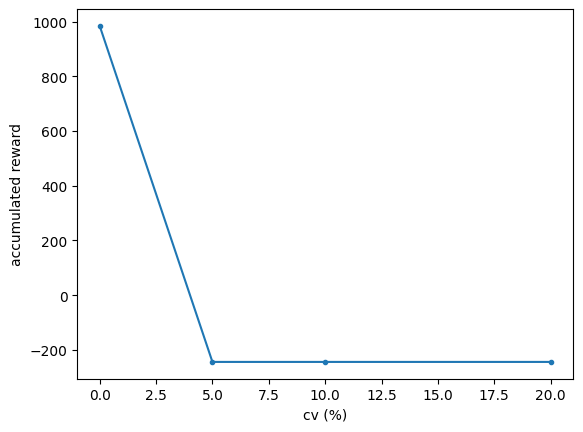

In [190]:
y = []
for key, val in data_transformer.items():
    y.append(np.sum(val))

plt.plot(data_transformer.keys(), y, marker='.', ls='-')
plt.ylabel('accumulated reward')
plt.xlabel('cv (%)')
plt.show()